# Grafos y Grafos dirigidos

En el análisis de relaciones entre elementos podemos construir asociaciones entre nodos que representarán nuestros elementos, entendidos como entidades. Estas entidades o elementos tendrán conexiones hacía otros elementos y nos permitirán analizar de una forma más sensata cómo se comportan internamente los datos, para poder segmentarlos después o dirigir estudios específicos, calcular distancias o caminos, que nos hablen de por ejemplo, los proyectos relacionados mediante sus entidades detectadas.

Una forma de comenzar a analizar los datos a partir de sus entidades, es determinar primero, quiénes estarán relacionados con quiénes. Por ejemplo, dentro de las muestras de proyectos, podríamos encontrar personas involucradas en el proyecto, como el líder, los programadores, arquitectos y demás. Podríamos entonces decidir estudiar las relaciones entre estas personas para poder guiar estudios sobre la eficiencia de los involucrados, saber a cuántas personas ha liderado un líder, la eficiencia de los proyectos de un programador o cosas incluso más profundas cómo, qué lenguajes de programación son familiares a un grupo de líderes, para contrastar en futuro quizás si el líder está o no capacitado para asumir un proyecto bajo algún lenguaje o framework específico.

Los grafos son geometrías construidas con nodos (`nodes`) y aristas (`edges`) entre ellos. Los nodos representan las entidades a relacionar y las aristas las conexiones que existen entre los nodos.

A una arista se le puede asociar información adicional, como datos sobre distancia entre los elementos, fuerza de conexión, colores, figuras, ascendencia o metadatos en general.

Existen dos tipos de grafos:

* No dirigidos: La conexión (arista entre dos nodos) no tiene dirección, solo se establece que dos elementos tienen una relación equivalente de uno al otro.
* Dirigidos: La conexión (arista entre dos nodos) está dirigida de un nodo hacia el otro y se llaman digrafos. Aquí podría haber una relación del nodo inicial al final, pero no al revés, por ejemplo, de un líder a un programador, la conexión podría ser la cantidad de proyectos en las que el líder manda al programador, y otro programador en algún momento podría llegar a ser líder o no, formando un grafo dirigido, dónde podríamos preguntarnos si hay un camino entre un líder y otro líder a través de sus programadores, para de ahí analizar cuáles fueron sus proyectos.

## Acerca de `networkx` y `graphviz`

La librería de `networkx` basada en `graphviz`, nos permite hacer operaciones con grafos dirigidos y no dirigidos y también visualizarlos. Por ejemplo, encontrar rutas entre un nodo y otro, fusionar o separar grafos, etc.

In [56]:
! pip install networkx

## Construcción de un grafo no dirigido

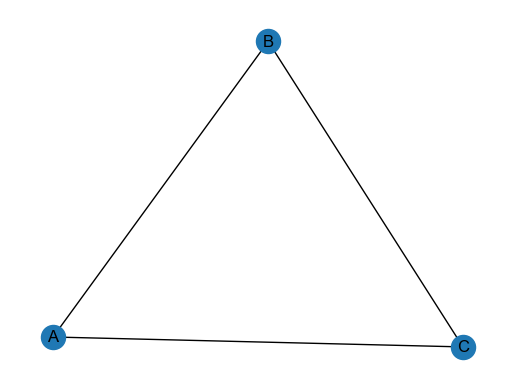

In [57]:
import networkx as nx

G = nx.Graph()

G.add_nodes_from(["A", "B", "C"])

G.add_edges_from([
    ("A", "B"),
    ("B", "C"),
    ("A", "C"),
])

pos = nx.spring_layout(G)

nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)

## Crear un grafo no dirigido (digrafo)

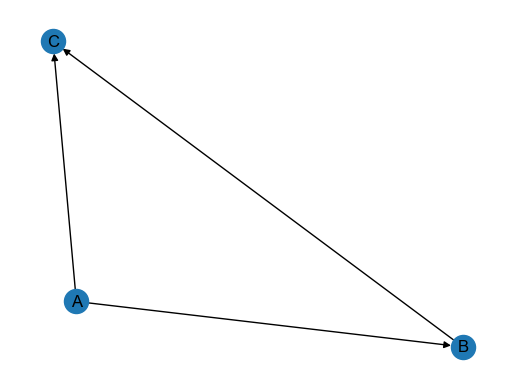

In [58]:
import networkx as nx

G = nx.DiGraph()

G.add_nodes_from(["A", "B", "C"])

G.add_edges_from([
    ("A", "B"),
    ("B", "C"),
    ("A", "C"),
])

pos = nx.spring_layout(G)

nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)

In [59]:
nx.shortest_path(G, "A", "C")

['A', 'C']

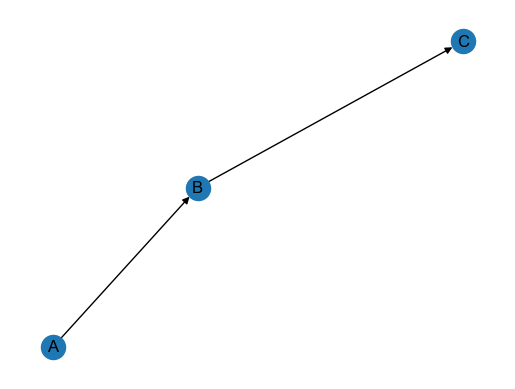

In [60]:
G.remove_edge("A", "C")

pos = nx.spring_layout(G)

nx.draw_networkx_labels(G, pos)

nx.draw(G, pos)

In [61]:
nx.shortest_path(G, "A", "C")

['A', 'B', 'C']

In [62]:
nx.shortest_path_length(G, "A", "C")

2

In [63]:
# nx.shortest_path(G, "C", "A") # ERROR: No hay camino entre los nodos
try:
    nx.shortest_path(G, "C", "A")
except:
    print("No hay camino entre C hacía A")

No hay camino entre C hacía A


## Caso de Estudio - De los Proyectos encontrar los programadores relacionados con un líder

In [64]:
import pandas as pd

proyectos = pd.read_excel("data/ProyectosFinalizados.xlsx", sheet_name="base")

def limpiar_columna(columna):
    # 1. Reemplazar caracteres especiales
    columna = columna.replace(" ", "_") \
        .replace("á", "a") \
        .replace("é", "e") \
        .replace("í", "i") \
        .replace("ó", "o") \
        .replace("ú", "u") \
        .replace("ñ", "n") \
        .replace("+", "_") \
        .replace(".", "_") \
        .replace("(", "_") \
        .replace(")", "")
    import re
    # 2. Poner un guion bajo entre cambio de letras de minúscula a mayúsculas
    columna = re.sub("([a-z])([A-Z])", "\\1_\\2", columna)
    # 3. Poner un guion bajo entre ID y letra
    columna = re.sub("ID([A-Za-z])", "ID_\\1", columna)
    # 4. Poner un guion bajo entre número y letra
    columna = re.sub("([0-9])([A-Za-z])", "\\1_\\2", columna)
    # 4. Poner un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])([0-9])", "\\1_\\2", columna)
    # 5. Quitar un guion bajo entre letra y número
    columna = re.sub("([A-Za-z])_([0-9])", "\\1\\2", columna)
    # 6. Poner un guion bajo entre letra y número final
    columna = re.sub("([A-Za-z])([0-9])$", "\\1_\\2", columna)
    # 7. Convertir a mayúsculas
    columna = columna.upper()
    return columna

proyectos.columns = map(limpiar_columna, proyectos.columns.values)

proyectos.head()

,ID_PROYECTO,EMPRESA,PETICION,PETICION_1,PET_EMPRESA,NOMBRE,CFP,EFICIENCIA,PDR,ESFUERZO_TOTAL_P,...,PDR_S,PDR_M_1,PDR_M_2,PDR_L,LEAD_TIME,F1_GESTIONDELA_DEMANDA,F2_ELICITACION,F3_CONTRUCCION,F4_FINAL,TAMANO
0,1,México,8318.0,8318,8318México,Modificación a la utileria de generación de pa...,12,NaN,33.708333,404.5,...,NaN,NaN,NaN,NaN,914.0,825.0,8.0,42.0,35.0,10-29
1,2,México,9619.0,9619,9619México,Modificacion al programa Vbncarga.exe,2,NaN,147.500000,295.0,...,NaN,NaN,NaN,NaN,609.0,584.0,7.0,14.0,1.0,2-9
2,3,México,10438.0,10438,10438México,Permisos para Cambios de puntos de Sembrado- P...,11,NaN,51.375455,1019.0,...,NaN,NaN,NaN,NaN,519.0,461.0,2.0,37.0,1.0,10-29
3,4,México,10522.0,10522,10522México,Corrección del informe TabuladoCredito,11,NaN,47.727273,525.0,...,NaN,NaN,NaN,NaN,493.0,455.0,9.0,27.0,1.0,10-29
4,5,México,10528.0,10528,10528México,Corrección al Tabulado de Carteras y Hojas men...,4,NaN,26.290000,213.0,...,NaN,NaN,NaN,NaN,557.0,520.0,5.0,30.0,0.0,2-9


## 1. Encontrar los líderes de cada proyecto

In [65]:
lideres = list(proyectos["LIDER"].unique())

lideres = lideres[:30]

lideres, len(lideres)

(['ROSARIO GUADALUPE MEDINA ESPINOZA\t',
  'Carlos Jesus Quintero Andrade',
  'MARADY PACHECO QUINTERO',
  'ALBA GUADALUPE QUINONEZ SAN JUAN',
  'JESSICA IRACEMA MARTINEZ AYON',
  'JULIO CESAR OLEA DAMAS',
  'FRANCISCO JAVIER ESCALANTE LUGO',
  'HUMBERTO SANCHEZ LOPEZ',
  'GUADALUPE SANCHEZ MEZA',
  'AURORA ROJO ZEPEDA',
  'ALEXIS VALENZUELA QUINTERO',
  'FRANCISCA ROMERO VALVERDE',
  'GERMAN GUSTAVO AMILLANO GAMEZ',
  'YOSINA MEREDITH LUGO GALAVIZ',
  'ERIK ROSARIO ZAMORANO LOPEZ',
  'NIDIA MARITZA LOPEZ LOPEZ',
  'ERIK OMAR CARRILLO PORTILLO',
  'YAZMIN DEL ROSARIO MARQUEZ BENITEZ',
  'MARIO ROMERO FUENTES',
  'OSWALDO MICHEL PEREZ',
  'MARCOS WILLIAMS RICALDAY MORALES',
  'CARMEN LUCIA VERDUGO MACIAS',
  'JORGE ARMANDO RAMIREZ ACOSTA',
  'LEONZO ANTONIO LEON INZUNZA',
  'PRISCILA MASCARENO ROSAS',
  'ANGEL GABRIEL PULIDO BARRON',
  'HECTOR CORTES CALDERON',
  'SHEILA RUBI LOPEZ DAGNINO',
  'FRANCISCO JAVIER MONTOYA CUADRAS',
  'KEILA ABIGAIL LARRETA CHAMORRO'],
 30)

## 2. Encontrar los programadores en todos los proyectos

In [66]:
proyectos["PROGRAMADOR_1"].dropna()

1333            ADA VIANEY ARAUJO ALVAREZ
1334       DAVID GUADALUPE GONZALEZ FELIX
1335           GREY GEOBANHY GARCIA VALLE
1336       DAVID GUADALUPE GONZALEZ FELIX
1337     DIANA LAURA GUTIERREZ VALENZUELA
                      ...                
2927             ANSELMO VERDUGO GASTELUM
2928          DEREK ALLAN SOLANO GONZALEZ
2929    FRANCISCO JAVIER GUERRERO HEREDIA
2930       FRANCISCO DANIEL CAMPOS MEDINA
2931         JUAN CARLOS HERNANDEZ VARGAS
Name: PROGRAMADOR_1, Length: 1168, dtype: object

In [67]:
proyectos["PROGRAMADOR_2"].dropna()

1333    VICTOR HUGO ONTIVEROS VILLALEJOS
1334      NICOLAS ALEJANDRO RIVERA PEREZ
1335            YOCELINE MEJIA BOJORQUEZ
1336      NICOLAS ALEJANDRO RIVERA PEREZ
1337       JOSE DE JESUS GUTIERREZ REYES
                      ...               
2927               EVER FIERRO HERNANDEZ
2928    FAUSTO EDUARDO HERNANDEZ HERRERA
2929           MARCO VINICIO PAYAN RAYOS
2930            JUAN CARLOS ROJAS GARCIA
2931                           QUETZALLY
Name: PROGRAMADOR_2, Length: 855, dtype: object

In [68]:
programadores = []

programadores.extend(proyectos["PROGRAMADOR_1"].dropna().values)
programadores.extend(proyectos["PROGRAMADOR_2"].dropna().values)
programadores.extend(proyectos["PROGRAMADOR_3"].dropna().values)
programadores.extend(proyectos["PROGRAMADOR_4"].dropna().values)
programadores.extend(proyectos["PROGRAMADOR_5"].dropna().values)

programadores = list(set(programadores))

#programadores = programadores[:50]

programadores, len(programadores)

(['LUIS ROBERTO MOLINA RODRIGUEZ',
  'BRANDON TIRADO MENDOZA',
  'JESUS ALEJANDRO AGUILAR SICAIROS',
  'PEDRO ALBERTO AVILA CRISTERNA',
  'FELIX MIGUEL GONZALEZ CALERO',
  'JULIO ANTONIO CHAVEZ DOMINGUEZ',
  'LUIS MANUEL ROMERO SALAZAR',
  'JESUS GUADALUPE MEZA BELTRAN',
  'JORGE LUIS HERNANDEZ PRADO',
  'JESUS ENODIO CALDERON SAMANIEGO',
  'ANGEL EDUARDO GONZALEZ ROCHIN',
  'JOSE JUAN VERDUGO INSUA',
  'JESUS BERNABE GARCIA VELAZQUEZ',
  'JOSE DEMETRIO AMADOR LIZARRAGA',
  'ERNESTO DIEGO SANCHEZ TELLAECHE',
  'URIEL FRANCISCO GOMEZ GONZALEZ',
  'OSCAR EDUARDO HERRAN CALDERON',
  'TITO JOSUE ARMENTA RODRIGUEZ',
  'JUAN PAUL CHAVEZ SIERRA',
  'NESTOR JACOBO ESPINOZA CASTRO',
  'JUAN DIEGO VALENZUELA RIVERA',
  'JESUS EDUARDO LUQUE OCHOA',
  'HUMBERTO ROCHIN MACIAS',
  'JAVIER EDUARDO BELTRAN LEYVA',
  'MARIA ALEJANDRINA CHAVEZ MONROY',
  'JAVIER AARON VELAZQUEZ TORRES',
  'JESUS HERIBERTO ACOSTA GUTIERREZ',
  'EDGAR HERIBERTO PEREZ MORENO',
  'JOSE LUIS LEON SALAZAR',
  'DANIEL EDGARDO 

## 3. Creamos una lista de aristas para cada líder-progrador

In [69]:
# Hay una conexión si el líder y el programador aparecen en un proyecto
edges = []

count = 0

for lider in lideres:
    count += 1
    print(count, lider)
    for programador in programadores:
        total_proyectos_juntos = proyectos[
            (proyectos["LIDER"] == lider) &
            (
                (proyectos["PROGRAMADOR_1"] == programador) |
                (proyectos["PROGRAMADOR_2"] == programador) |
                (proyectos["PROGRAMADOR_3"] == programador) |
                (proyectos["PROGRAMADOR_4"] == programador) |
                (proyectos["PROGRAMADOR_5"] == programador)
            )
        ].count().values[0]

        if total_proyectos_juntos >= 1:
            edges.append((lider, programador, { "proyectos": total_proyectos_juntos }))

edges[:5]

1 ROSARIO GUADALUPE MEDINA ESPINOZA	
2 Carlos Jesus Quintero Andrade
3 MARADY PACHECO QUINTERO
4 ALBA GUADALUPE QUINONEZ SAN JUAN
5 JESSICA IRACEMA MARTINEZ AYON
6 JULIO CESAR OLEA DAMAS
7 FRANCISCO JAVIER ESCALANTE LUGO
8 HUMBERTO SANCHEZ LOPEZ
9 GUADALUPE SANCHEZ MEZA
10 AURORA ROJO ZEPEDA
11 ALEXIS VALENZUELA QUINTERO
12 FRANCISCA ROMERO VALVERDE
13 GERMAN GUSTAVO AMILLANO GAMEZ
14 YOSINA MEREDITH LUGO GALAVIZ
15 ERIK ROSARIO ZAMORANO LOPEZ
16 NIDIA MARITZA LOPEZ LOPEZ
17 ERIK OMAR CARRILLO PORTILLO
18 YAZMIN DEL ROSARIO MARQUEZ BENITEZ
19 MARIO ROMERO FUENTES
20 OSWALDO MICHEL PEREZ
21 MARCOS WILLIAMS RICALDAY MORALES
22 CARMEN LUCIA VERDUGO MACIAS
23 JORGE ARMANDO RAMIREZ ACOSTA
24 LEONZO ANTONIO LEON INZUNZA
25 PRISCILA MASCARENO ROSAS
26 ANGEL GABRIEL PULIDO BARRON
27 HECTOR CORTES CALDERON
28 SHEILA RUBI LOPEZ DAGNINO
29 FRANCISCO JAVIER MONTOYA CUADRAS
30 KEILA ABIGAIL LARRETA CHAMORRO


[('MARADY PACHECO QUINTERO',
  'AMILCAR OCTAVIO TRUJILLO ORTIZ',
  {'proyectos': 1}),
 ('MARADY PACHECO QUINTERO',
  'JOSE FERNANDO ANDRADE ARREOLA',
  {'proyectos': 2}),
 ('MARADY PACHECO QUINTERO',
  'JESUS HILARIO RODRIGUEZ REYES',
  {'proyectos': 1}),
 ('MARADY PACHECO QUINTERO',
  'LUIS FERNANDO SIERRA LIZARRAGA',
  {'proyectos': 2}),
 ('ALBA GUADALUPE QUINONEZ SAN JUAN',
  'SANTOS JONATHAM CELIS LOPEZ',
  {'proyectos': 1})]

In [72]:
# Ordena las aristas por mayor cantidad de proyectos
edges = sorted(edges, key=lambda edge: edge[2]["proyectos"], reverse=True)

edges[:5]

[('KEILA ABIGAIL LARRETA CHAMORRO',
  'RICARDO ARTURO CASTRO QUINTERO',
  {'proyectos': 9}),
 ('KEILA ABIGAIL LARRETA CHAMORRO',
  'IVETH ALONDRA GUZMAN CALDERON',
  {'proyectos': 7}),
 ('KEILA ABIGAIL LARRETA CHAMORRO',
  'JESUS OLEGARIO MONTOYA AGUILAR',
  {'proyectos': 6}),
 ('NIDIA MARITZA LOPEZ LOPEZ',
  'JESUS ENRIQUE DORAME QUINTERO',
  {'proyectos': 5}),
 ('YAZMIN DEL ROSARIO MARQUEZ BENITEZ',
  'JESUS NOLBERTO AVILEZ OSUNA',
  {'proyectos': 5})]

## 4. Generamos el grafo que explica quiénes son los líderes y programadores que han participado en más proyectos

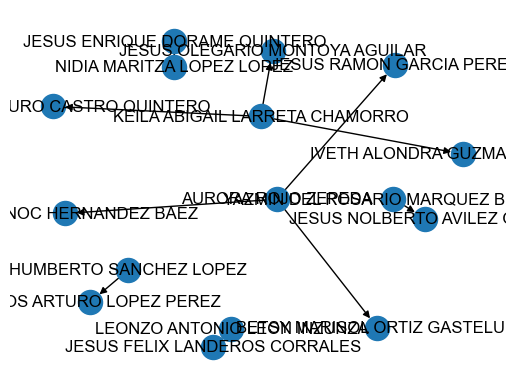

In [78]:
import networkx as nx

G = nx.DiGraph()

#G.add_nodes_from(lideres)
#G.add_nodes_from(programadores)

G.add_edges_from(edges[:10])

pos = nx.spring_layout(G)

nx.draw_networkx_labels(G, pos)
nx.draw(G, pos)

¿Cómo podríamos comparar la eficiencia de los proyectos de un líder con los programadores con los que más participa versus la eficiencia en los proyectos dónde falta algún programador de ellos?